In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()


# Analisis exploratorio de datos


In [72]:
#Cargando los datos
data_credit_cards= pd.read_csv('Credits_Cards_Dataset.csv')
data_credit_cards.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [73]:
#Veamos la info de los datos
data_credit_cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

vemos que en la única columna donde faltan una cantidad de datos relevante es MINIMUM_PAYMENTS,así que, reemplacemos los datos faltantes por la mediana (se escoge la mediana ya que es menos supceptible a outliers)

In [74]:
# calculando la mediana
median = data_credit_cards['MINIMUM_PAYMENTS'].median()

# Reemplazar los valores nulos por la mediana
data_credit_cards['MINIMUM_PAYMENTS'].fillna(median, inplace=True)

#eliminando el dato nulo de credit limit 
data_credit_cards.dropna(inplace=True)

In [75]:
data_credit_cards.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,844.999569,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2332.906149,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.343947,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Con las estadísticas de nuestro Dataframe podemos sacar unas cuantas conclusiones iniciales:
1. Balance (Saldo):

 El promedio de saldo es de 1564.47, lo que indica que la mayoría de los clientes tienen un saldo significativo en sus cuentas.
   
La amplia diferencia entre el mínimo (0) y el máximo (19043.14) sugiere que hay una variabilidad considerable en los saldos de los clientes.

1. Balance Frequency (Frecuencia de actualización del saldo):

El promedio de frecuencia de actualización del saldo es de 0.88, lo que sugiere que la mayoría de los clientes actualizan con regularidad sus saldos.
El hecho de que algunos clientes tengan un valor de 0 en esta métrica indica que hay clientes que no actualizan su saldo con frecuencia.

3. Purchases (Compras):

El promedio de compras realizadas es de 1003.20, lo que indica un nivel moderado de actividad de compra entre los clientes.
La amplia variabilidad en los valores de compra, desde 0 hasta 49039.57, sugiere que hay clientes con diferentes niveles de gasto.

4. Cash Advance (Avance en efectivo):

El promedio de avances en efectivo es de 978.87, lo que indica que algunos clientes utilizan la opción de avance en efectivo de su tarjeta de crédito.
La amplia diferencia entre el mínimo (0) y el máximo (47137.21) muestra que hay clientes que hacen un uso significativo de los avances en efectivo.

5. Credit Limit (Límite de crédito):

El promedio del límite de crédito es de 4494.45, con una amplia variabilidad entre los clientes.
El límite de crédito máximo de 30000 indica que algunos clientes tienen un mayor poder adquisitivo y capacidad de crédito.

Ahora ya con la data completa y limpia, Ahora podemos analizar la correlación entre las variables asignadas:

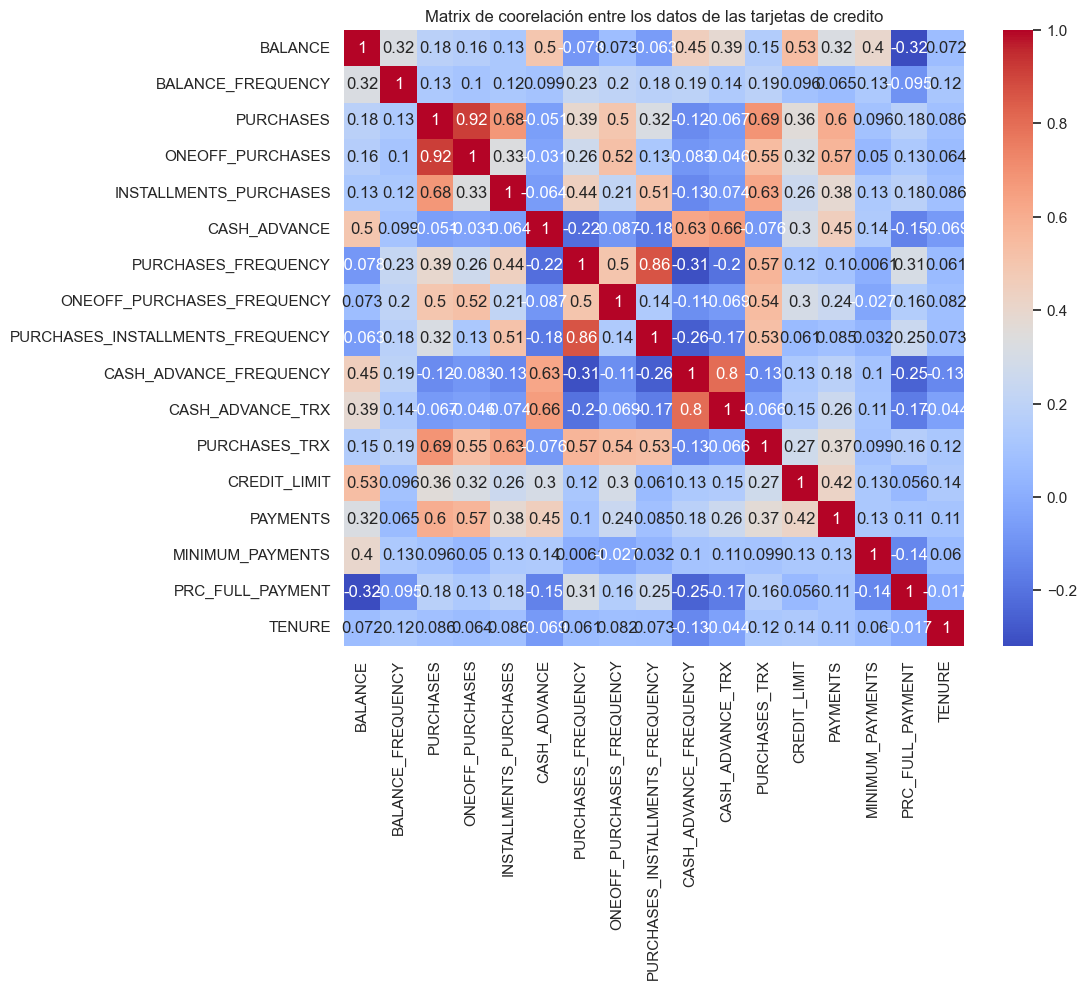

In [76]:
#veamos la correlación

#Primero filtremos solo las variables númericas
numeric_columns = data_credit_cards.select_dtypes(include=np.number).columns

#Matriz de correlación 
correlation_matrix = data_credit_cards[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Matrix de coorelación entre los datos de las tarjetas de credito')
plt.show()



In [77]:
#Veamos solamente las relaciones que esten solamente por encima de 0.5 (En valor absoluto)

# Crear una lista para almacenar las duplas de variables correlacionadas
correlated_variables = []

# Recorrer la matriz de correlación
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        # Obtener el valor de correlación
        correlation_value = correlation_matrix.iloc[i, j]
        
        # Verificar si la correlación es mayor a 0.5 o menor a -0.5
        if correlation_value > 0.5 or correlation_value < -0.5:
            # Agregar las variables y el valor de correlación a la lista
            correlated_variables.append([correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_value])

# Crear un DataFrame a partir de la lista de variables correlacionadas
df_correlated = pd.DataFrame(correlated_variables, columns=['Variable 1', 'Variable 2', 'Correlation'])

# Ordenar el DataFrame en orden descendente según el valor de correlación
df_correlated = df_correlated.sort_values(by='Correlation', ascending=False)

# Mostrar el DataFrame de variables correlacionadas
df_correlated


,Variable 1,Variable 2,Correlation
1,PURCHASES,ONEOFF_PURCHASES,0.916844
13,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,0.862921
17,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,0.799573
3,PURCHASES,PURCHASES_TRX,0.689552
2,PURCHASES,INSTALLMENTS_PURCHASES,0.679889
11,CASH_ADVANCE,CASH_ADVANCE_TRX,0.656493
10,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,0.628535
9,INSTALLMENTS_PURCHASES,PURCHASES_TRX,0.628097
4,PURCHASES,PAYMENTS,0.603252
14,PURCHASES_FREQUENCY,PURCHASES_TRX,0.568408


## Algunas posible observaciones interesantes entre la correlación de los datos:


La variable 'PURCHASES' muestra una correlación alta con 'ONEOFF_PURCHASES' (0.917), 'INSTALLMENTS_PURCHASES' (0.680), 'PURCHASES_TRX' (0.690) y 'PAYMENTS' (0.603). Esto sugiere que los clientes que realizan compras más grandes (ONEOFF_PURCHASES) tienden a realizar más compras en general (PURCHASES) y en cuotas (INSTALLMENTS_PURCHASES). También hay una relación positiva con los pagos realizados (PAYMENTS), lo que indica que los clientes que realizan más compras también tienden a realizar pagos más grandes.

La variable 'CASH_ADVANCE' muestra una correlación significativa con 'CASH_ADVANCE_FREQUENCY' (0.629) y 'CASH_ADVANCE_TRX' (0.656). Esto sugiere que los clientes que hacen más avances de efectivo (CASH_ADVANCE) también tienden a hacerlo con más frecuencia (CASH_ADVANCE_FREQUENCY) y en una mayor cantidad de transacciones (CASH_ADVANCE_TRX).

La variable 'PURCHASES_FREQUENCY' muestra una correlación alta con 'PURCHASES_INSTALLMENTS_FREQUENCY' (0.863). Esto indica que los clientes que realizan compras con frecuencia también tienden a realizar compras a plazos con frecuencia. También hay correlaciones moderadas con 'ONEOFF_PURCHASES_FREQUENCY' (0.501) y 'PURCHASES_TRX' (0.568), lo que indica relaciones adicionales entre la frecuencia de compras.

Estas correlaciones sugieren patrones interesantes en el comportamiento de los clientes de tarjetas de crédito. 

In [78]:
data_credit_cards.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


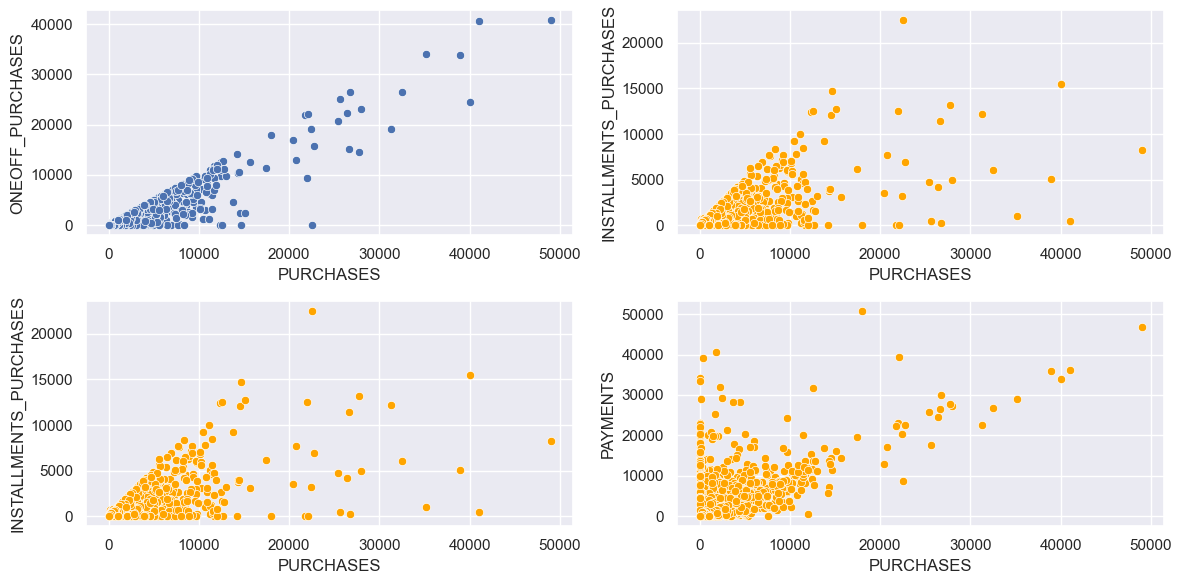

In [79]:
#Veamos estas correlaciones en gráficos

# Configurar subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Primer gráfico: puchase vs oneoff:purchases
sns.scatterplot(data=data_credit_cards,x='PURCHASES',y='ONEOFF_PURCHASES',ax=axes[0,0])


# Segundo gráfico: Purchase vs INSTALLMENTS_PURCHASES
sns.scatterplot(data=data_credit_cards,x='PURCHASES',y='INSTALLMENTS_PURCHASES',ax=axes[0,1],color='orange')


sns.scatterplot(data=data_credit_cards,x='PURCHASES',y='INSTALLMENTS_PURCHASES',ax=axes[1,0],color='orange')

sns.scatterplot(data=data_credit_cards,x='PURCHASES',y='PAYMENTS',ax=axes[1,1],color='orange')

# Ajustar espacio entre subplots
plt.tight_layout()

plt.show()


# Segmentación de los Clientes
### Primero con el algoritmo de k-means

In [86]:
from sklearn.cluster import KMeans

# Supongamos que tienes tus datos en un DataFrame llamado 'df' con las columnas relevantes para la clusterización

# Selecciona las columnas relevantes para la clusterización
data = data_credit_cards[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']]

# Crea una instancia del modelo K-means con el número deseado de clusters
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Ajusta el modelo a los datos
kmeans.fit(data)

# Obtiene las etiquetas de cluster asignadas a cada muestra
labels = kmeans.labels_

# Agrega las etiquetas al DataFrame original
data_credit_cards['Cluster'] = labels

# Muestra los resultados
data_credit_cards[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'Cluster']]


c:\Users\bry36\OneDrive\Escritorio\my_data_proyect\Job\Clustering_and_insights_for_credit_cards\Entorno_de_analisis\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS,Cluster
0,40.900749,95.40,1000.0,201.802084,0
1,3202.467416,0.00,7000.0,4103.032597,3
2,2495.148862,773.17,7500.0,622.066742,3
3,1666.670542,1499.00,7500.0,0.000000,3
4,817.714335,16.00,1200.0,678.334763,0
...,...,...,...,...,...
8945,28.493517,291.12,1000.0,325.594462,0
8946,19.183215,300.00,1000.0,275.861322,0
8947,23.398673,144.40,1000.0,81.270775,0
8948,13.457564,0.00,500.0,52.549959,0


c:\Users\bry36\OneDrive\Escritorio\my_data_proyect\Job\Clustering_and_insights_for_credit_cards\Entorno_de_analisis\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


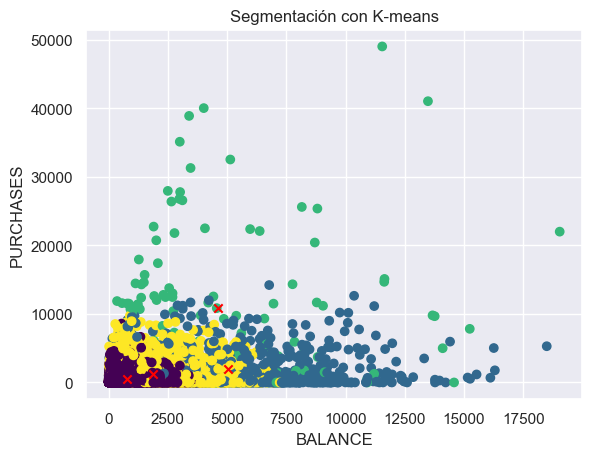

In [83]:


# Ejecutar el algoritmo K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data)

# Obtener las etiquetas de cluster asignadas a cada punto de datos
labels = kmeans.labels_

# Obtener las coordenadas de los centroides de cada cluster
centroids = kmeans.cluster_centers_

# Crear un gráfico de dispersión coloreando los puntos según los clusters
plt.scatter(data['BALANCE'], data['PURCHASES'], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')

plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.title('Segmentación con K-means')

plt.show()


c:\Users\bry36\OneDrive\Escritorio\my_data_proyect\Job\Clustering_and_insights_for_credit_cards\Entorno_de_analisis\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


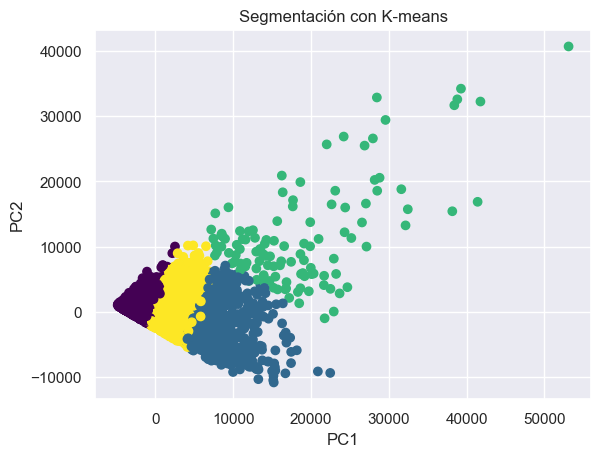

In [82]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Ejecutar el algoritmo K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data)

# Obtener las etiquetas de cluster asignadas a cada punto de datos
labels = kmeans.labels_

# Reducir la dimensionalidad de los datos utilizando PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Crear un gráfico de dispersión coloreando los puntos según los clusters
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Segmentación con K-means')

plt.show()


### Ahora con DSCAN


In [87]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Ejecutar el algoritmo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data)

# Obtener las etiquetas de cluster asignadas a cada punto de datos
labels = dbscan.labels_

# Número de clusters en los resultados (ignorando el ruido, representado como -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

# Crear un gráfico de dispersión coloreando los puntos según los clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Segmentación con DBSCAN')

plt.show()

# Imprimir el número de clusters y el número de puntos clasificados como ruido
print(f'Número de clusters: {n_clusters}')
print(f'Número de puntos clasificados como ruido: {n_noise}')


InvalidIndexError: (slice(None, None, None), 0)